## Part 1. Parsing with your own Context-Free Grammar

In this first part of Lab 3, you will write your own English grammar using a Python library called NLTK (Natural Language ToolKit). You will then use a built-in Recursive Descent parser and plot some parse trees.

First, you need to import the NLTK library, otherwise nothing will work. Press Ctrl-Enter inside the following cell:




In [ ]:
import sys
!{sys.executable} -m pip install nltk
import nltk

Next, define your context-free grammar. Running this command does not produce any output:

In [ ]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

This grammar can be utilized to parse a sentence, such as:

In [ ]:
sent = "Bob ate a telescope in the park".split()
print(sent)

The sentence needs to be given as a list of words; that is why the `split()` function is used above.

Next, initialize a recursive descent parser for your grammar. This is a command that does not produce any output:

In [ ]:
rd_parser = nltk.RecursiveDescentParser(grammar1)

The parser can be used to parse a sentence and produce parse trees. Note that the parsing may produce _more than one_ parse tree. That is why the parses are here saved into a variable called `trees` in plural:

In [ ]:
trees = rd_parser.parse(sent)

To see what these parse trees look like, write a _for_ loop that iterates over all parse trees and prints them in a format that uses nested brackets. It is possible to choose what types of brackets to use. Here we will need to have square brackets \[ \]. 

In [ ]:
for tree in trees:
    print(tree.pformat(parens='[]'))

It would be nice to draw these trees as pictures. Drawing trees is possible in NLTK (using the `Tree.draw()` method), but unfortunately it doesn't work inside these jupyter notebooks.

What you can do instead is to open a syntax tree generator web application in another tab of your web browser: http://mshang.ca/syntree/

Now, you can copy-paste the bracketed strings that your parser produced into the syntax tree generator. You can only enter one syntax tree at a time, and you need to use square brackets (rather than any other types of brackets) for this to work.

If you copy-paste the two different parses from "Bob ate a telescope the a park" into the syntax tree generator (one at a time), you should obtain two pictures that look like this:
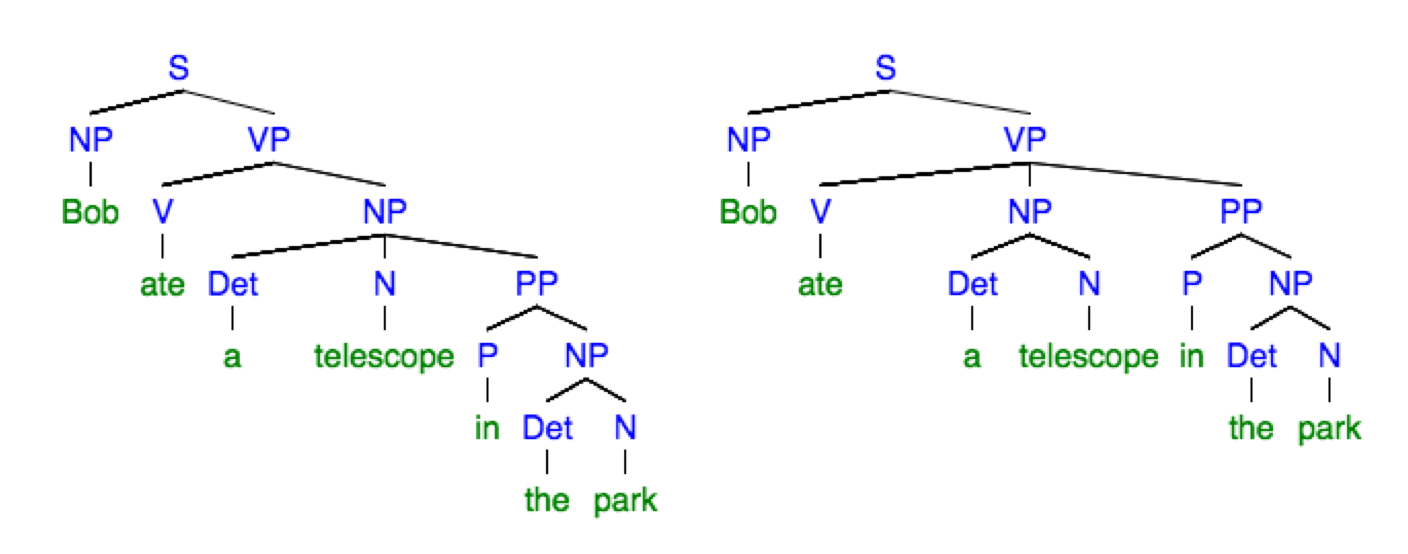

### Your own English grammar

Your next task is to write a (partially) more advanced English grammar. In this grammar you need to take into account agreement between subject and predicate in the present tense. In the third person singular, the verb takes the ending '-s', such as in "Bob eats a banana", whereas in the other persons there is no ending: "we eat bananas", "the cats eat fish".

Another thing you need to take into account is the separate object form of some personal pronouns, "I love you" vs. "you love me".

Note also that "fish" is plural in this grammar: "fish eat fish".

Your grammar should be able to parse the following sentences correctly (and other similar sentences by analogy):

In [ ]:
sents = [ \
         "Bob eats a banana",
         "we eat a banana",
         "we eat bananas", 
         "the dog sees Bob", 
         "the dogs see Bob",
         "a cat eats fish",
         "Mary sees Bob",
         "I love you",
         "you love me",
         "he loves Mary",
         "the cat loves the dogs",
         "the dogs love the cat",
         "a banana sees a banana",
         "dogs love cats",
         "they love fish",
         "the cats love it",
         "the cats see him",
         "it sees us",
         "she loves them",
         "the bananas love her",
         "you eat them",
         "Mary sees fish",
         "bananas eat me",
         "fish eat fish",
         "the fish see the fish"
        ]

Enter your grammar here:

In [ ]:
grammar2 = nltk.CFG.fromstring("""
  S -> REPLACE THIS AND ADD YOUR OWN RULES HERE
""")

Then test your grammar by running the code below (which you do not have to change in any way or understand fully):

In [ ]:
rd_parser = nltk.RecursiveDescentParser(grammar2)
for i, sent in enumerate(sents):
    print("Sentence #{:d}: {:s}".format(i, sent))
    trees = rd_parser.parse(sent.split())
    for tree in trees:
        print(tree.pformat(parens='[]'))
    print()

Running the parser should not produce any errors. You should see the parses of all the above test sentences as nested bracketed strings.

Copy-paste some of the parses into the syntax tree generator at http://mshang.ca/syntree/ in order to see the actual parse trees.

Add some _ungrammatical_ sentences to the list of sentences, such as the ones below:

In [ ]:
ungrammatical_sents = [ \
                      "me loves you",
                      "she eats banana",
                      "I eat a bananas",
                      "he eat the banana",
                      "bananas loves it",
                      "the dogs see the Bob",
                      "they love we",
                      "Mary see Bob", 
                      "a cat love dogs", 
                      "a cats loves the dog", 
                      "dog loves cat",
                      "the dog loves",
                      "eats a banana",
                      "I see the the dog",
                      "a the cat loves fish",
                      "sees",
                      "them"
                      ]

Try to parse the ungrammatical sentences and make sure that your grammar does not accept any of them. If it does, go back and modify your grammar and try again:

In [ ]:
for i, sent in enumerate(ungrammatical_sents):
    print("Ungrammatical sentence #{:d}: {:s}".format(i, sent))
    trees = rd_parser.parse(sent.split())       # There should not to be any trees to plot!
    for tree in trees:
        print(tree.pformat(parens='[]'))
    print()

After this, you can continue to Part 2.